In [20]:
# importing required packages
import matplotlib.pyplot as plt
import numpy as np
# contains clustering algorithm methods
import kMeans

In [21]:
# reading in image
image = plt.imread("smallImage.jpg")

# converting image to array of RGB values
pixels = np.reshape(image, (image.shape[0] * image.shape[1], 3))

In [22]:
# asking users for number of clusters, in this case number of colors of new image
K = int(input("Enter the number of colors you want to simplify the image into: "))

# choosing random pixels as the first set of centroids
centroids = np.random.permutation(pixels)[0:K]

# getting array of which centroid is closest to each pixel
closest_centroids = kMeans.get_closest_centroid(pixels, K, centroids)

In [23]:
# number of times to run the algorithm
iterations = 40

for i in range(iterations):
    # getting new centroids with information of which centroid is closest to each pixel
    centroids = kMeans.compute_new_centroids(pixels, K, closest_centroids)
    # recomputing which centroid is closest to each pixel
    closest_centroids = kMeans.get_closest_centroid(pixels, K, centroids)

# converting from list to numpy array
closest_centroids = np.array(closest_centroids)
factor = 1

# turning each pixel into its closest centroid
new_pixels = centroids[closest_centroids, :]

# if pixels are floats in range 0 - 255 scale down to 0 - 1 range to get valid results
if not (type(new_pixels[0][0]) == np.int64) and np.max(new_pixels[0:new_pixels.shape[0] - 1]) > 1:
    final_pixels = np.reshape(new_pixels/255, image.shape)
else:
    final_pixels = np.reshape(new_pixels, image.shape)


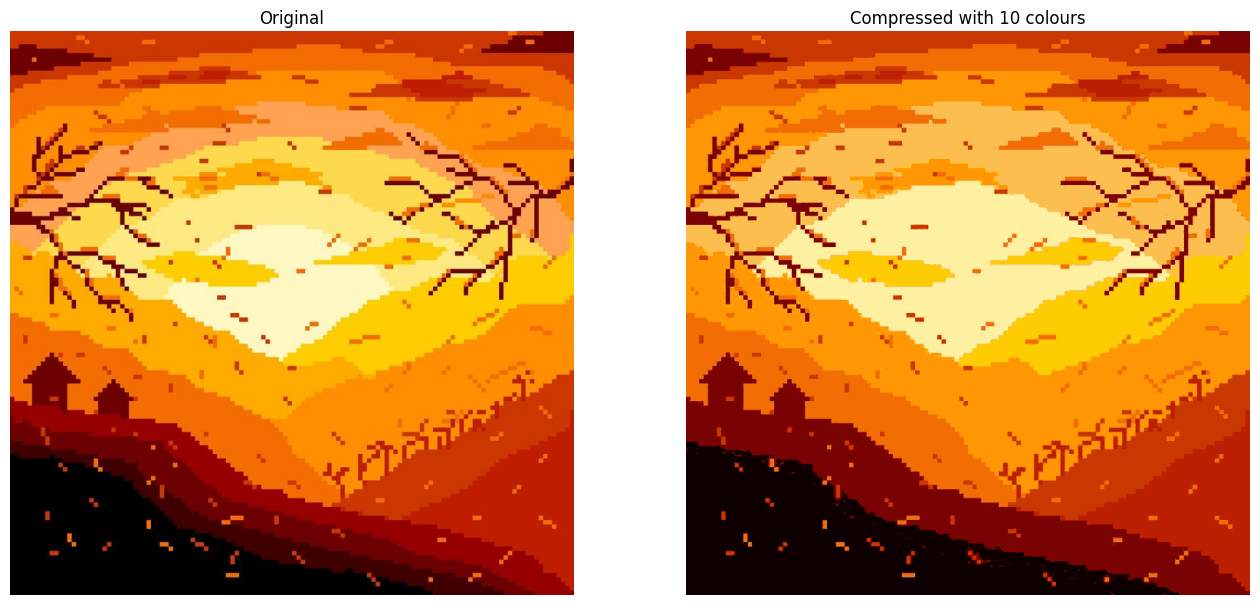

In [24]:
# making a 1 by 2 grid of subplots each 16 x 16
fig, ax = plt.subplots(1,2, figsize=(16,16))

# showing and labeling image on first figure
ax[0].imshow(image)
ax[0].set_title('Original')
# axis not needed in this situation
ax[0].set_axis_off()

# same with figure two but now showing image after being reduced to K colors
ax[1].imshow(final_pixels)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()